# Computing $\pi$ with Interpolation

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

Here's the half-circle function:

In [2]:
def f(x):
    return np.sqrt(1-x**2)

We'll only look at it on $[0,1]$:

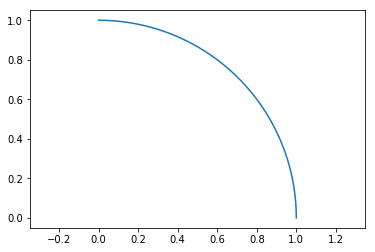

In [3]:
x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, f(x_plot))
_ = plt.axis('equal')

The area under this curve should be ... $\frac{\pi}{4}$

In [11]:
degree = 100

nodes = np.linspace(0, 1, degree+1) # Number of interpolation points = degree + 1
nodes

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

Now build the Vandermonde matrix:

In [12]:
V = np.array([
    nodes**i
    for i in range(degree+1)
]).T

And find the coefficients as `coeffs`:

In [13]:
coeffs = la.solve(V, f(nodes))
coeffs

array([  1.00000000e+00,  -3.29866074e-05,  -4.97053026e-01,
        -8.08601990e-02,  -5.85173358e-01,   7.28865413e+01,
        -1.89390938e+03,   2.75346529e+04,  -2.65531581e+05,
         1.81205414e+06,  -8.99031995e+06,   3.24967210e+07,
        -8.31887897e+07,   1.36630440e+08,  -8.79874194e+07,
        -1.71901984e+08,   4.75248041e+08,  -2.99163464e+08,
        -5.05999958e+08,   1.01136454e+09,  -4.16941372e+08,
        -2.56118943e+08,  -3.96562970e+07,  -5.85195947e+07,
         1.24791330e+09,  -1.27513118e+09,  -4.84894205e+07,
         2.53923862e+08,  -1.73034858e+08,   1.25113363e+09,
        -1.46493105e+09,   5.08981615e+08,   1.77547842e+07,
        -1.28071391e+08,  -3.80798363e+08,   8.41284660e+08,
        -1.19846608e+08,  -4.62966376e+08,   2.75471049e+08,
        -4.76982180e+07,  -4.29237820e+08,   8.60725409e+08,
        -2.00088076e+08,  -2.69825400e+08,  -6.99741096e+08,
         3.94753697e+08,   2.72411787e+08,   3.01597233e+08,
         6.99091875e+08,

Now evaluate the interpolant at `x_plot`

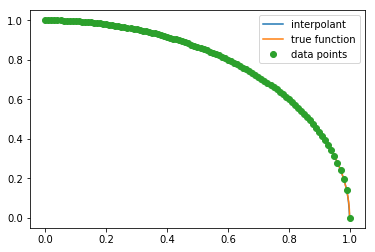

In [14]:
interp_plot = 0*x_plot
for i in range(degree+1):
    interp_plot += coeffs[i] * x_plot**i
    
plt.plot(x_plot,  interp_plot, label = "interpolant")
plt.plot(x_plot, f(x_plot), label = "true function")
plt.plot(nodes, f(nodes), "o", label = "data points")

plt.legend(loc="best")


Now integrate the interpolant:

In [15]:
# Evaluate the integral from s to t, and therefore the area under the 1/4 circle (circle of radius 1)
t = 1
s = 0
integral = 0
for i in range(degree+1):
    integral += coeffs[i] * 1/(i+1) * (t**(i+1) - s**(i+1))

In [16]:
my_pi = 4*integral
my_pi

3.1413446106016636